# 实战案例：Python机器学习小案例源码 -- 骨科疾病预测

**作者：** [Robin](http://wenda.chinahadoop.cn/people/Robin_TY)  
**日期：** 2018/02  
**提问：** [小象问答](http://wenda.chinahadoop.cn/)  
**数据集来源：** [kaggle](https://www.kaggle.com/uciml/biomechanical-features-of-orthopedic-patients)  

## 1. 案例描述
近年来，人工智能（AI）发展迅速，从AlphaGo连败人类棋手，到商场里随处可见的智能机器人，人工智能已经从实验室走向了大众，不论是舆论关注度还是相关领域的投资，都在节节增长。更重要的是，人工智能技术也到达到了新的阶段，在工业界、医疗、SaaS、农业等等各行各业的应用都引起了巨大的势能。这其中，应用增长率最高的当属AI在医疗领域的应用。

该案例通过数据分析的方法探索骨科就诊人员的数据，建立一个简单的机器学习模型，用于预测就诊人员是否患有骨科疾病。该案例适合初次接触数据分析、机器学习及人工智能的读者。

## 2. 数据集描述
* 该数据集由Kaggle[提供]((https://www.kaggle.com/uciml/biomechanical-features-of-orthopedic-patients)
* 数据字典
    * **pelvic_incidence**: 骨盆入射角，浮点型
    * **pelvic_tilt numeric**: 骨盆倾斜，浮点型
    * **lumbar_lordosis_angle**: 腰椎前凸角度，浮点型
    * **sacral_slope**: 骶骨倾斜角，浮点型
    * **pelvic_radius**: 盆腔半径，浮点型
    * **degree_spondylolisthesis**: 腰椎滑脱程度，浮点型
    * **class**: 病人是否患病，字符型：Abnormal, Normal
  

## 3. 任务描述
* 根据病人的6项医疗数据，推断该病人是否患有骨科疾病

## 4. 项目代码

### 4.1 数据获取

In [1]:
# 引入必要的包
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pickle
# %matplotlib notebook
%matplotlib inline

In [2]:
data_file = './data.csv'

all_data = pd.read_csv(data_file)

In [3]:
# 数据预览
all_data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
# 数据详情
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [5]:
# 数据统计
all_data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


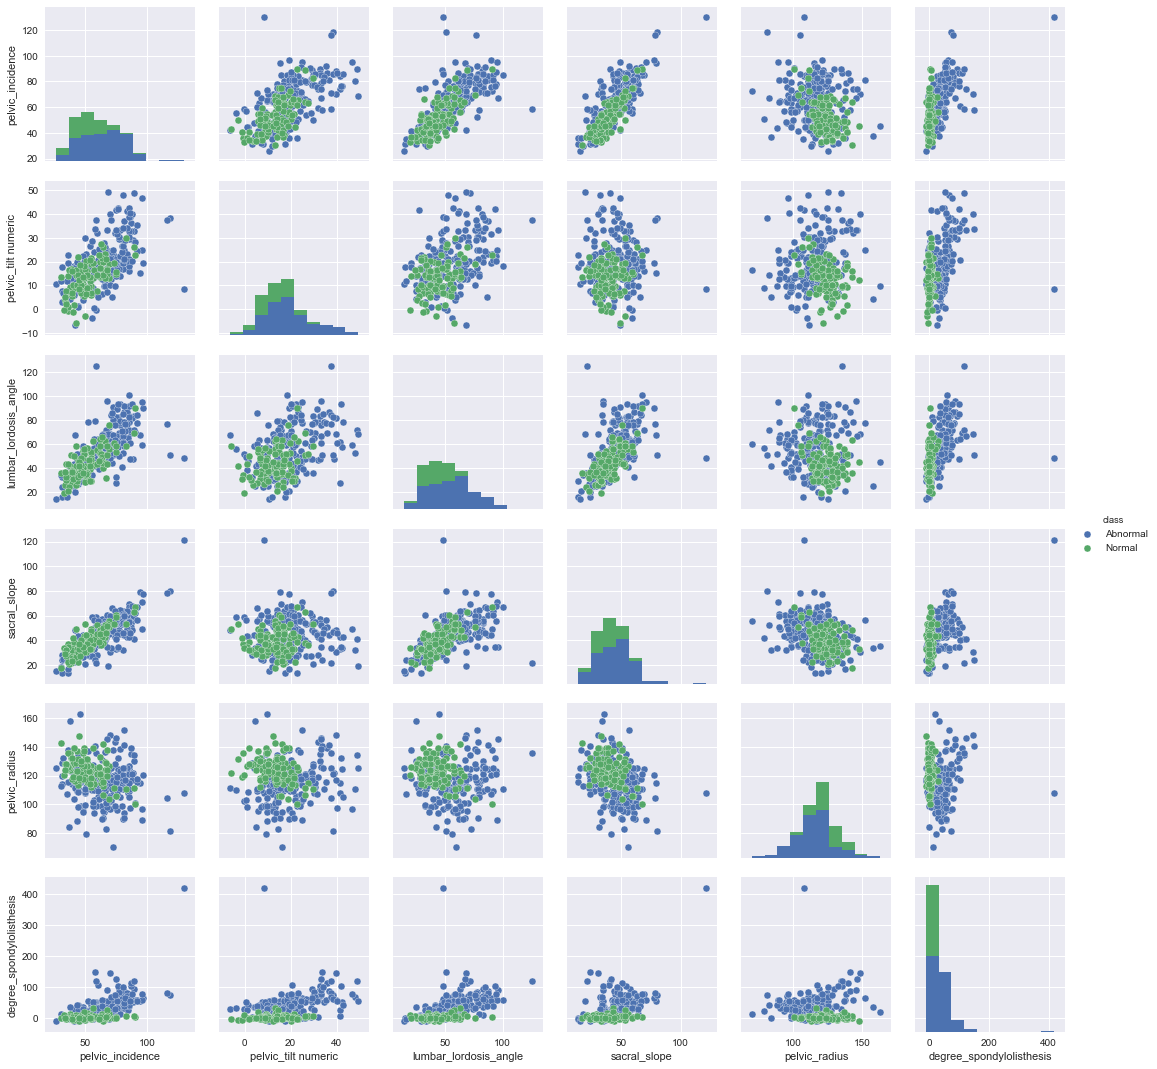

In [6]:
# 数据特征关系可视化
sns.pairplot(data=all_data, hue='class')

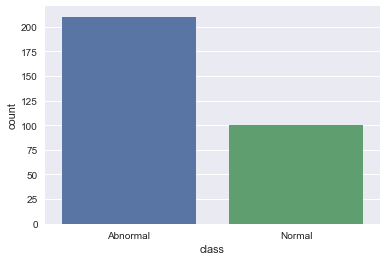

In [7]:
# 数据类别个数查看
sns.countplot(x="class", data=all_data)

### 4.2 数据处理

In [8]:
# 将类别转换为编码
all_data['label'] = all_data['class'].map({'Abnormal': 1, 'Normal': 0})
all_data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,label
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal,1


In [9]:
# 获取X和y
X = all_data.iloc[:, :6].values
y = all_data['label'].values
print('总样本个数：', X.shape[0])
print('每个样本的维度：', X.shape[1])

总样本个数： 310
每个样本的维度： 6


In [10]:
# 分割训练集和测试集
# 1/3的样本作为测试样本，用于测试学习的模型
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=10)
print('训练集样本数：', X_train.shape[0])
print('测试集样本数：', X_test.shape[0])

训练集样本数： 206
测试集样本数： 104


### 4.3 数据分析

这里使用的是简单的[kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)模型

In [11]:
# 建立一个kNN模型
knn_model = KNeighborsClassifier()

# 训练模型
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
# 在测试集上测试模型
y_pred = knn_model.predict(X_test)

In [13]:
# 计算预测准确率
acc = accuracy_score(y_test, y_pred)
print('预测准确率：{:.2f}'.format(acc))

预测准确率：0.89


测试使用不同的k值

In [14]:
k_list = [1, 5, 10, 15, 20]
acc_results = []
models_list = []

for k in k_list:
    # 建立模型
    knn_model = KNeighborsClassifier(n_neighbors=k)
    # 训练模型
    knn_model.fit(X_train, y_train)
    # 测试模型
    y_pred = knn_model.predict(X_test)
    # 计算准确率
    acc = accuracy_score(y_test, y_pred)
    
    models_list.append(knn_model)
    acc_results.append(acc)
    
    print('k={}, 准确率={:.2f}'.format(k, acc))

k=1, 准确率=0.87
k=5, 准确率=0.89
k=10, 准确率=0.86
k=15, 准确率=0.85
k=20, 准确率=0.88


可视化不同的k值对结果的影响

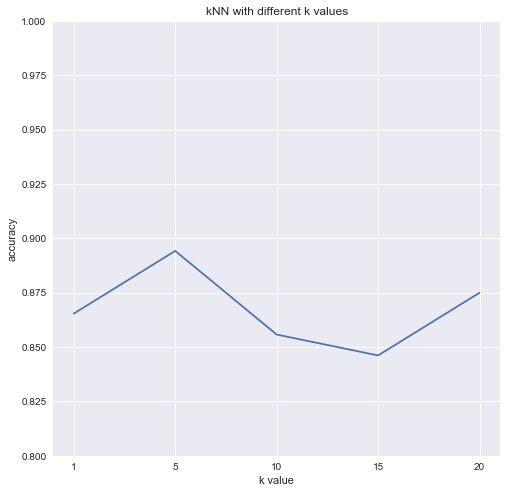

In [15]:
plt.figure(figsize=(8, 8))
plt.plot(acc_results)
# 标题
plt.title('kNN with different k values')

# x轴
plt.xlabel('k value')
plt.xticks(range(len(k_list)), k_list)

# y轴
plt.ylabel('accuracy')
plt.ylim([0.8, 1.0])

plt.show()

### 4.4 结果展示

In [16]:
# 找出最优的k值所对应的model
best_k_idx = np.argmax(acc_results)
best_model = models_list[best_k_idx]

In [17]:
# 持久化模型
model_file = './model.pkl'
with open(model_file, 'wb') as f:
    pickle.dump(best_model, f)

In [18]:
# 随机选择n个病人的数据
n = 5
random_sample_data = all_data.sample(n)
random_sample_data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,label
242,39.087264,5.536602,26.932038,33.550662,131.584420,-0.759461,Normal,0
174,61.411737,25.384364,39.096869,36.027373,103.404597,21.843407,Abnormal,1
244,63.026300,27.336240,51.605017,35.690060,114.506608,7.439870,Normal,0
208,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Abnormal,1
170,64.809541,15.174078,58.839994,49.635463,111.679961,21.407198,Abnormal,1


In [19]:
# 加载模型，做预测
with open(model_file, 'rb') as f:
    trained_model = pickle.load(f)
trained_model.predict(random_sample_data.iloc[:, :6].values)

array([0, 1, 1, 1, 1])

## 5. 案例总结
* 该项目通过学习kNN模型，基本能“准确”地预测出病人是否患有骨科疾病，同时也包括了以下概念：
    * 数据处理
    * 数据分析和机器学习的基本步骤
    * 数据可视化


## 6. 课后练习
* 熟悉Python的读者，可以试着将以上代码写成.py文件
* 试着只使用6个特征中的一些，观察对结果的影响；
* 考虑只用准确率能否真实地体现模型的好坏，是否有其他的评价指标？

## 参考资料
1. [10分钟走入Pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [matplotlib教程](https://matplotlib.org/users/pyplot_tutorial.html)
3. [seaborn教程](https://seaborn.pydata.org/tutorial.html)
4. [scikit-learn教程](http://scikit-learn.org/stable/tutorial/index.html)